<a href="https://colab.research.google.com/github/Bray72/IBM/blob/main/Project_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [4]:
# Install library
!pip install -q langchain_community replicate pandas matplotlib seaborn

# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Setup Replicate Granite
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
model = "ibm-granite/granite-3.2-8b-instruct"
output = Replicate(model=model, replicate_api_token=api_token)

# Load dataset
csv_path = os.path.join(path, "IMDB Dataset.csv")
df = pd.read_csv(csv_path)


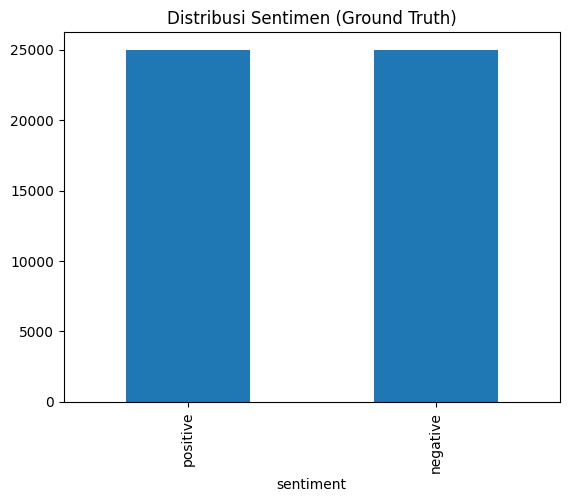

In [5]:
df['sentiment'].value_counts().plot(kind='bar', title="Distribusi Sentimen (Ground Truth)")
plt.show()


In [6]:
reviews = df['review'][:5].tolist()
reviews_text = "\n".join([f"Review {i+1}: {rev}" for i, rev in enumerate(reviews)])
prompt = f"""
Analyze the following movie reviews.
Classify each as Positive or Negative, and explain briefly:
{reviews_text}
"""
response = output.invoke(prompt)
print(response)


Review 1: Positive
This review is positive as the user expresses admiration for the show "Oz." They use words like "hooked," "brutality," "unflinching scenes," and "hardcore," which, while describing intense and graphic content, also convey a sense of respect for the show's authenticity and boldness. The reviewer also mentions developing a "taste" for Oz, indicating a growing appreciation for the show's unique qualities.

Review 2: Positive
This review is positive. The reviewer uses words like "wonderful," "unassuming," "seamless editing," "masterful production," and "terrificly written and performed piece." These positive descriptors and the overall tone of the review indicate a high level of praise for the production.

Review 3: Positive
This review is positive. The user expresses enjoyment of the movie, calling it a "light-hearted comedy," "wittier than 'Devil Wears Prada,'" and "more interesting than 'Superman.'" They also appreciate the performances, particularly Scarlett Johansso